# **ELTONJOHN OKETCH WEEK 9 PROJECT 1 (CORE) REGRESSION IP, WEEK 4(MODULE 2)**

- This week's project requires me to implement a K-nearest neighbor (kNN) classifier  and a Naive Bayes classifier. Once I conduct the experiments, I will calculate the resulting metrics:

#1.) **Research Question**

##a.) **Defining the question**

- For the first dataset, we are going to use the Titanic dataset to build a model that predicts whether or not some of the passengers aboard the Titanic ship survived after the ship sunk some time back. I am going to levearage variable features to fine tune the models responsible for making those predictions. My aim is to uncover what features were of importance ie (increasing or determining once's chance of survival).

- Which of the KNN classifier split was the best at the prediction?

##b.) **Understanding the context**

- Within project 1, I’ll gain access to two similar datasets that include Titanic passenger information like name, age, gender, socio-economic class, etc. One dataset is titled (train.csv) and the other is titled (test.csv).

Train.csv will contain the details of a subset of the passengers on board and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The (test.csv) dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s my job to predict these outcomes.

Using the patterns I find in the train.csv data, I will predict whether the other Titanic passengers on board (found in test.csv) survived.

##c.) **Defining metric for success**

- I am going to use the K-Nearest Neighbor algorithm to create a model that shows the likelihood of a passenger surviving the accident. Then I will optimise the model to its best and say that I succeeded when I have an accuracy of between (70% - 95%). Less than that will probably indicate  that the model is underfitting while more than that range will mean that the model is overfitting.

## d.) **Recording the experimental design**

- Randomly partition each dataset into two parts i.e 80 - 20  sets.
For dataset 1, because I don't have the label for the test set, I will use the train set to create train and test data (i.e. splitting further), then perform K-nearest neighbor classification.

- I shall compute the accuracy (percentage of correct classification).
Report the confusion matrix of each classifier.

- I shall Repeat step 2 to step 4 twice, each time splitting the datasets differently i.e. 70-30, 60-40, then note the outcomes of your modeling.
Suggest and apply at least one of the optimization techniques that I learned earlier this week.

- Provide further recommendations to improve both classifiers.

#2.) **Dataset Loading and Preview**

**Importing Libraries**

In [1]:
#Reading libraries
import pandas as pd
import numpy as np
import seaborn as sb
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from importlib import reload

**Loading the Dataset**

In [2]:
#load the datasets  
df = pd.read_csv("/content/train (5) (1).csv")
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


#3.) **Checking the Data**

In [3]:
# Preview the top of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Preview the bottom of the dataset
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
#Checking for the shape of the dataframe
print('The dataset has'+ str (df.columns.shape)+'columns and' +str (df.index.shape) +'rows')

The dataset has(12,)columns and(891,)rows


In [6]:
#Checking for data types
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

- Its worth noting that all columns had the right datatype

In [7]:
# Printing the the number of unique values of the columns
print(df.nunique())

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64


In [8]:
# Printing the unique values
columns = df.columns
for i in columns:
  print('Unique values in', i , 'are :')
  print(df[i].unique())
  print('                                                                           ')
  print('***************************************************************************')

Unique values in PassengerId are :
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238

In [9]:
#Viewing the column names in the dataset
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
# Checking the summary statistics of the dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **4.) External Data Source Validation**

- Using Kaggle and wikipidea, I was able to verify the validity of the dataset we have here. The dataset indeed should contain the variable features and information that best  describe the passengers within the Titanic and some of those features would be considered when computing once's chances of survival when the ship sank.

# **5.) Tidying the Dataset**

In [11]:
# Previewing the dataset
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


**Checking for missing Value**s

In [12]:
#Checking for missing values
df.isnull().any()
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
# Replacing our missing values with mean
df['Age'].fillna(df['Age'].mean(), inplace = True)
# Confirming all the null values have been replaced
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Cabin has most of its entries as missing values so we are going to drop it all together.

In [14]:
# Dropping cabin column
df.drop(['Cabin'], axis = 1, inplace = True)
# Confirming all the null values have been replaced
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

- For the embarked column with missing values we are going to impute those missing values with the column mode

In [15]:
#Filling misssing values of age and embarked column
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
# Confirming all the null values have been replaced
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

- We have no missing values now.

In [16]:
# previewing the dataset
df.shape

(891, 11)

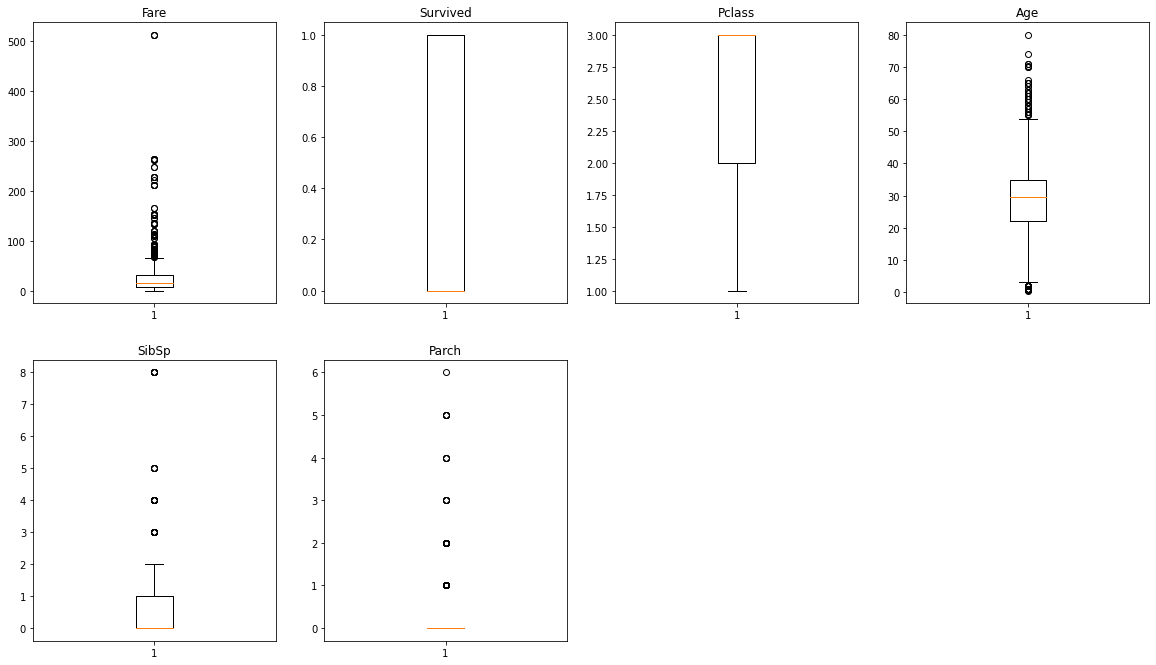

In [17]:
# checking for outliers
# making a dictionary for numerical columns
columns_dict = {'Fare': 1, 'Survived': 2, 'Pclass': 3, 'Age': 4, 'SibSp': 5, 'Parch': 6}

plt.figure(figsize=(20,30))

# make a boxplot for each numerical column
for variable,i in columns_dict.items():
  plt.subplot(5,4,i)
  plt.boxplot(df[variable])
  plt.title(variable)

plt.show()

- From the boxplots, I can observe outliers in the Fare and SibSp columns, but I will retain them since they represent Features of some of the passengers

In [18]:
# Previewing the outliers to see whether they reflect true values
Outlier = df[df['Fare'] > 300]
Outlier

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C


- I will not drop these outliers, they are features of said passengers.

**Checking for duplicated Values**

In [19]:
#checking if the dataset has duplicated values. If present, duplicates will be dropped
df.duplicated().sum()

0

In [20]:
#Checkig the shape of data after tidying it up 
df.shape

(891, 11)

# **6.) Exploratory Data Analysis**

## **a) Univariate Analysis**

In [21]:
# Frequency distribution of feature in dataset
for var in df.columns:
    print(df[var].value_counts())

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64
0    549
1    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


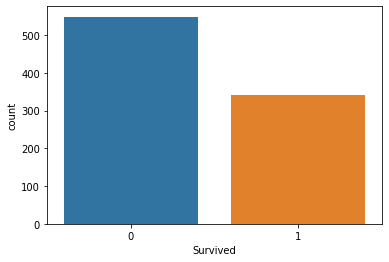

In [22]:
# A count plot for those who survived
sns.countplot(df.Survived)

- Less people survived the sinking incident.

<Figure size 1000x300 with 0 Axes>

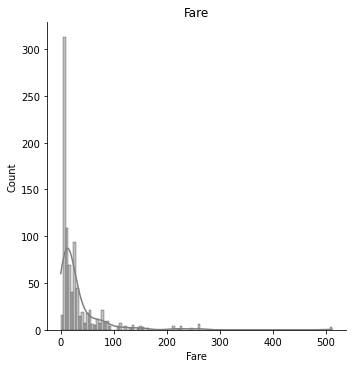

<Figure size 1000x300 with 0 Axes>

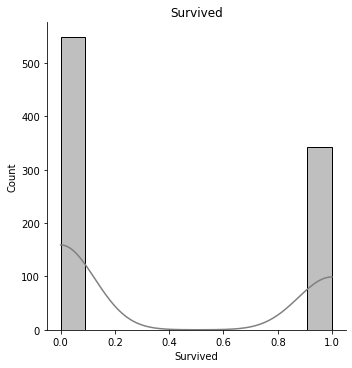

<Figure size 1000x300 with 0 Axes>

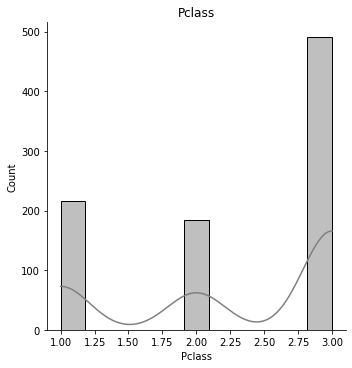

<Figure size 1000x300 with 0 Axes>

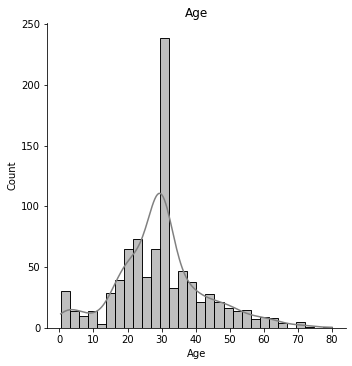

<Figure size 1000x300 with 0 Axes>

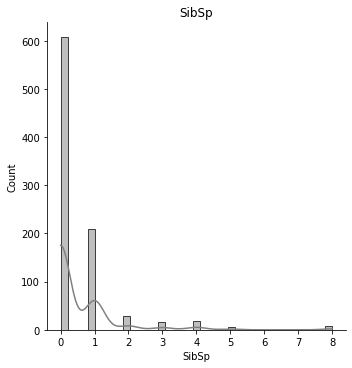

<Figure size 1000x300 with 0 Axes>

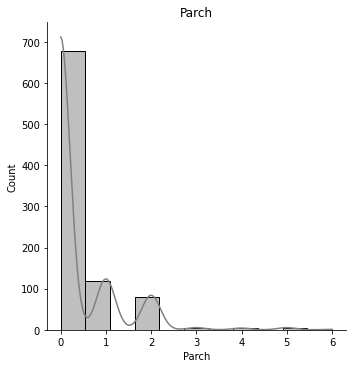

In [23]:
# Plotting the individual histograms
#
col = ['Fare', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch']
for i in col:
  plt.figure(figsize = (10,3), dpi=100)
  sns.displot(df[i], kde = True, color = 'grey')
  plt.title(i, color = 'Black')
  plt.show()

In [24]:
# Creating pie charts for columns
def pie(df,column):
  data=df[column].value_counts()
  sns.set(font_scale=1.4)
  plt.figure(figsize=(7,6))
  pie=data.plot.pie(autopct='%.1f%%',labels=(df[column].unique()),startangle=0)
  plt.axis('equal')
  plt.title=(f'{column}'" DISTRIBUTION")
  plt.show()
  return plt.show()

In [25]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

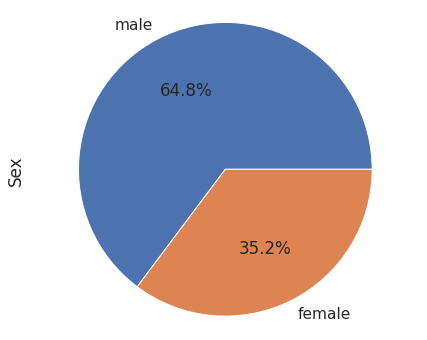

In [26]:
pie(df,'Sex')

- There were moremales than females in the Titanic ship

## **b) Bivariate Analysis**

In [27]:
# # Plotting pairplots
# sns.pairplot(df)
# plt.show()

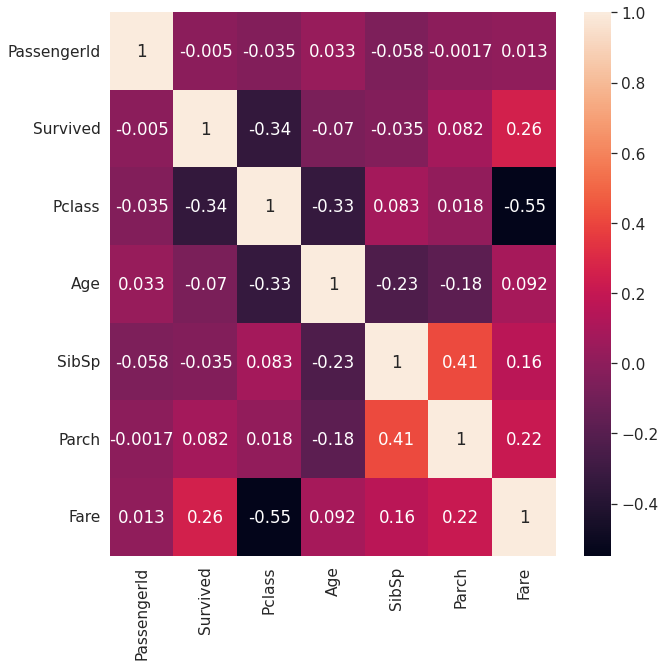

In [28]:
# Plotting a correlation matrix
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

## **c.) Multivariate Analysis**

# **7.)Implementing the Solution**

##**a.) K-NEAREST NEIGHBOUR**

- This week's project requires me to implement a K-nearest neighbor (kNN)

**Procedure**

- Randomly partition each dataset into two parts i.e 80 - 20  sets.
For dataset 1, because I don't have the label for the test set, I will use the train set to create train and test data (i.e. splitting further), then perform K-nearest neighbor classification.

- I shall compute the accuracy (percentage of correct classification).
Report the confusion matrix of each classifier.

- I shall Repeat step 2 to step 4 twice, each time splitting the datasets differently i.e. 70-30, 60-40, then note the outcomes of your modeling.
Suggest and apply at least one of the optimization techniques that I learned earlier this week.

- Provide further recommendations to improve both classifiers

## **b.) Feature Engineering**

In [29]:
# I will drop the columns that will not be necessary to build our model
df = df.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Fare'])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.000000,1,0,S
1,1,1,female,38.000000,1,0,C
2,1,3,female,26.000000,0,0,S
3,1,1,female,35.000000,1,0,S
4,0,3,male,35.000000,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,S
887,1,1,female,19.000000,0,0,S
888,0,3,female,29.699118,1,2,S
889,1,1,male,26.000000,0,0,C


In [30]:
# I will create a column that tells us whether a passenger was on-board alone or with family.
df['Fam'] = df['SibSp'] + df['Parch']
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Fam
0,0,3,male,22.0,1,0,S,1
1,1,1,female,38.0,1,0,C,1
2,1,3,female,26.0,0,0,S,0
3,1,1,female,35.0,1,0,S,1
4,0,3,male,35.0,0,0,S,0


In [31]:
# From this fam column I can then create another feature to display those who were without family 

df["Self"] = df.Fam.apply(lambda x: 1 if x >= 1 else 0) 

In [32]:
# Then I can drop the uncessessary features that are somewhat redundant
df = df.drop(columns= [ 'Parch','SibSp', 'Fam'])

In [33]:
# Finally,for sex and embarked i should get dummies for their individual outcomes
df = pd.get_dummies(df)
df.head()

,Survived,Pclass,Age,Self,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,1,0,0,1
1,1,1,38.0,1,1,0,1,0,0
2,1,3,26.0,0,1,0,0,0,1
3,1,1,35.0,1,1,0,0,0,1
4,0,3,35.0,0,0,1,0,0,1


## **c.) K-nearest neighbor (kNN) classifier**

In [34]:
# Importing the libraries we'll require for building our model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [35]:
# Separating the target vaiable from the dataframe
X = df.drop('Survived', axis = 1)
y = df['Survived']

## **d.) Using the 80-20 Split**

In [36]:
# Dividing the dataframe into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [37]:
# Standardising the data to the same scale
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
# Training and Predictions
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

# Predict the Test set results
y_pred = classifier.predict(X_test)

In [39]:
#We compare the results of the predicted with the actual results in the y-test data
compare_df= pd.DataFrame({'Actual':y_test , 'Predicted': y_pred}) 
print(compare_df.head())
compare_df.describe()

     Actual  Predicted
495       0          0
648       0          0
278       0          0
31        1          1
255       1          0


,Actual,Predicted
count,179.000000,179.000000
mean,0.385475,0.324022
std,0.488073,0.469321
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [40]:
# Evaluating the 80-20 split model
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8268156424581006
[[100  10]
 [ 21  48]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       110
           1       0.83      0.70      0.76        69

    accuracy                           0.83       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.83      0.83      0.82       179



-  The model has a satisfactory accuracy of 83% according to the success metric but we are going to do hyperparameter tuning to find the best k, distance metrics and the other KNN parameters.

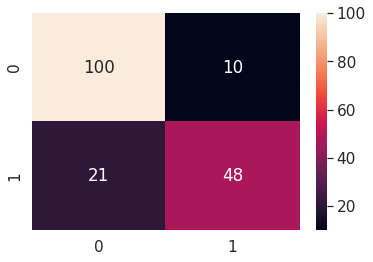

In [41]:
# Visualizing the confusion matrix using a Heatmap
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

In [42]:
#Using Grid search Cv to find the best parameters for the model
from sklearn.model_selection import GridSearchCV
estimator_KNN = KNeighborsClassifier(algorithm='auto')
parameters_KNN = {
    'n_neighbors': (1,20, 1),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')}
                   
# using GridSearch
grid_search_KNN = GridSearchCV(
    estimator=estimator_KNN,
    param_grid=parameters_KNN,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)

In [43]:
# Making prediction with the best parameters
KNN_1=grid_search_KNN.fit(X_train, y_train)
y_pred_KNN =KNN_1.predict(X_test)

In [44]:
#Parameter setting that gave the best results on the hold out data.
print(grid_search_KNN.best_params_ )

{'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}


- From using grid search we can now evealuate our model using the best parameters as  listed above.

**The Optimized 80-20 split mo**del

In [45]:
# Training and Predictions
classifier = KNeighborsClassifier(n_neighbors=20)
classifier.fit(X_train, y_train)

# Predict the Test set results
y_pred = classifier.predict(X_test)

In [46]:
#We compare the results of the predicted with the actual results in the y-test data
compare_df= pd.DataFrame({'Actual':y_test , 'Predicted': y_pred}) 
print(compare_df.head())
compare_df.describe()

     Actual  Predicted
495       0          0
648       0          0
278       0          0
31        1          1
255       1          1


,Actual,Predicted
count,179.000000,179.000000
mean,0.385475,0.279330
std,0.488073,0.449928
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [47]:
# Evaluating the optimized 80-20 model
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8268156424581006
[[104   6]
 [ 25  44]]
              precision    recall  f1-score   support

           0       0.81      0.95      0.87       110
           1       0.88      0.64      0.74        69

    accuracy                           0.83       179
   macro avg       0.84      0.79      0.80       179
weighted avg       0.83      0.83      0.82       179



- We can see an improvement of accuracy to 84%

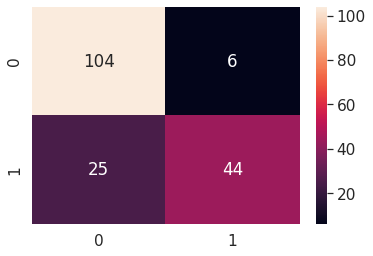

In [48]:
# Visualizing the confusion matrix using a Heatmap
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

##**e.) Using the 70-30 Split**

In [49]:
#Splitting into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [50]:
# Standardising the data to the same scale
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
# Training and Predictions
classifier = KNeighborsClassifier(n_neighbors=20)
classifier.fit(X_train, y_train)

# Predict the Test set results
y_pred = classifier.predict(X_test)

In [52]:
#We compare the results of the predicted with the actual results in the y-test data
compare_df= pd.DataFrame({'Actual':y_test , 'Predicted': y_pred}) 
print(compare_df.head())
compare_df.describe()

     Actual  Predicted
495       0          0
648       0          0
278       0          0
31        1          1
255       1          1


,Actual,Predicted
count,268.000000,268.000000
mean,0.373134,0.276119
std,0.484542,0.447913
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [53]:
# Evaluating the 70-30 split model
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8208955223880597
[[157  11]
 [ 37  63]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       168
           1       0.85      0.63      0.72       100

    accuracy                           0.82       268
   macro avg       0.83      0.78      0.80       268
weighted avg       0.82      0.82      0.81       268



- This model has an accuracy of 82 %. This lower than the 80-20 split model.

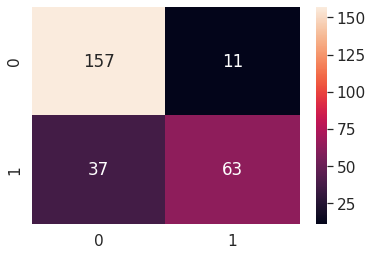

In [54]:
# Visualizing the confusion matrix using a Heatmap
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

## **f.) Using the 60-40 split**

In [55]:
#Splitting into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [56]:
# Standardising the data to the same scale
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
# Training and Predictions
classifier = KNeighborsClassifier(n_neighbors=20)
classifier.fit(X_train, y_train)

# Predict the Test set results
y_pred = classifier.predict(X_test)

In [58]:
#We compare the results of the predicted with the actual results in the y-test data
compare_df= pd.DataFrame({'Actual':y_test , 'Predicted': y_pred}) 
print(compare_df.head())
compare_df.describe()

     Actual  Predicted
495       0          0
648       0          0
278       0          0
31        1          1
255       1          1


,Actual,Predicted
count,357.000000,357.000000
mean,0.380952,0.299720
std,0.486302,0.458778
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [59]:
# Evaluating the 60-40 split model
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8123249299719888
[[202  19]
 [ 48  88]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       221
           1       0.82      0.65      0.72       136

    accuracy                           0.81       357
   macro avg       0.82      0.78      0.79       357
weighted avg       0.81      0.81      0.81       357



- This model has a 81% accuracy that is lower then both the 80-20 and 70-30 split models.

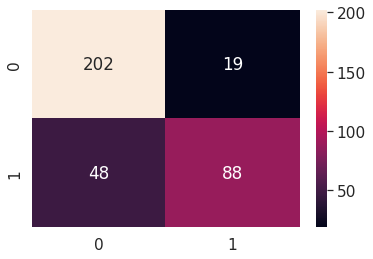

In [60]:
# Visualizing the confusion matrix using a Heatmap
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

# **8.) Different Model Prediction Outputs**

In [58]:
# Models vs accuracy score.
models = ['80-20 split', '70-30 split', '60-40 split']
accuracy_scores = [84,82,81]
model_results = pd.DataFrame({'Models': models, 'Accuracy_scores %': accuracy_scores})
model_results.sort_values(by = 'Accuracy_scores %',axis=0,ascending=False)

,Models,Accuracy_scores %
0,80-20 split,84
1,70-30 split,82
2,60-40 split,81


- The model split that performed the best in terms of accuracy scores was the 80-20 split model.

# **9.) Challenging The Solution**

## **a.) Gradient boost**

In [61]:
# Let's start with Gradient boosted classifier
# We use decision trees when performing gradient boosting 
# We will start by setting different learning rates and comparing the performance of the classifier 
from sklearn.ensemble import GradientBoostingClassifier
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training):", gb_clf.score(X_train, y_train))
    print("Accuracy score (validation):", gb_clf.score(X_test, y_test))
    print("                                                                                    ")
    print("*********************************************************************************")

Learning rate:  0.05
Accuracy score (training): 0.8352059925093633
Accuracy score (validation): 0.8095238095238095
                                                                                    
*********************************************************************************
Learning rate:  0.075
Accuracy score (training): 0.8408239700374532
Accuracy score (validation): 0.8151260504201681
                                                                                    
*********************************************************************************
Learning rate:  0.1
Accuracy score (training): 0.8408239700374532
Accuracy score (validation): 0.8123249299719888
                                                                                    
*********************************************************************************
Learning rate:  0.25
Accuracy score (training): 0.8520599250936329
Accuracy score (validation): 0.803921568627451
                                        

- I will chose the learning rate with the highest accuracy score that is 1 with 89% accuracy

In [64]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#Accuracy Checking Libraries
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.model_selection import cross_val_score

# Fit the model with our new hyperparameter
grboost=GradientBoostingClassifier(n_estimators=300,learning_rate=1)
grboost.fit(X_train,y_train)
y_predb=grboost.predict(X_test)

# Model Accuracy, how often is the classifier correct?
accuracyb=metrics.accuracy_score(y_test,y_predb)
print('The accuracy of the model is',str(accuracyb *100),'%')

The accuracy of the model is 75.91036414565826 %


- Using gradient boost, our accuracy drops to 76% hence the KNN classifier model was perfroming better than what we have here. Therefore we will retain our KNN classifier split models.

# **10.) Recommendation and Conclusison**

- The model that performed the best was the 80-20 split model with an accuracy of 84% this wasaccomplished by using the n_neighbours of 20.

- This model can be improvd by using optimal parameters to optimize the model and achieve great results.

# **11.) Follow up questions**

- All the questions I had defined have been answered using the availed data. Therefore there is no need of further data to answer the defined questions

##**a). Did we have the right data?**

- Yes we did have the right data to fully come up with models that make the predictions as requi

## **b). Do we need other data to answer our question**

- No, we require no additional data as all the questions have been answered and the necessary predictions have been made.

## **c). Did we have the right question?**

- Yes we did, the questions defined led to a very thourough yet vigourous exercise of making prediction using various KNN classifier modelling splits.The accuracy of each model split was measured and accounted for to pick forth the best model.